Scaling exercises


Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution

In [2]:
#imports
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle
import warnings
warnings.filterwarnings("ignore")

In [3]:
#pull dataset from wragngle fucntion
df = wrangle.wrangle_zillow()
df.head()

,bedroom,bathroom,area,tax_value,year_built,tax_amount,fips
7,3,2.0,2077,646760,1926,7924.68,6037
18,3,1.0,1244,169471,1950,2532.88,6037
19,3,2.0,1300,233266,1950,3110.99,6037
20,3,2.0,1222,290492,1951,3870.25,6037
40,2,1.0,725,37548,1953,576.47,6037


In [4]:
#since we do scaling only in train data, split the dataset
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [5]:
#How was split
train.shape,validate.shape,test.shape

((1023397, 7), (438600, 7), (365500, 7))

In [6]:
#define X_train with tax_value only
X_train = train[["tax_value"]]

In [7]:
# using minmaxscaler
scaler1 = MinMaxScaler()
#fit and transform the scaler
X_train_scaled1 = scaler1.fit_transform(X_train)

In [8]:
#print scaled values
X_train_scaled1[:4]

array([[0.11469232],
       [0.03496601],
       [0.02260135],
       [0.10826724]])

Text(0.5, 1.0, 'scaled')

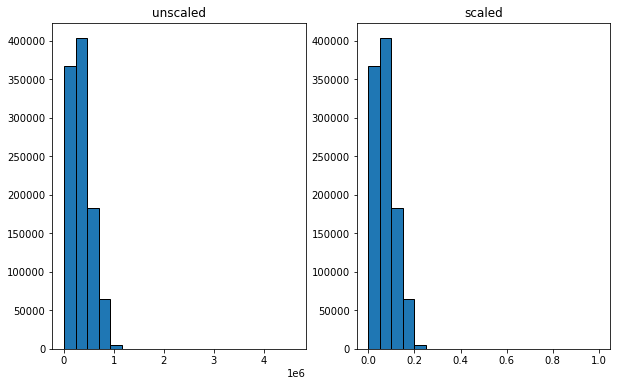

In [9]:
#visualizing unscaled and scaled
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.hist(X_train, bins=20, ec ="black")
plt.title('unscaled')
plt.subplot(122)
plt.hist(X_train_scaled1, bins=20, ec ="black")
plt.title('scaled')

the x axis has been scaled

In [10]:
#try standardscaler
scaler2 = StandardScaler()

In [11]:
#fit and transform the scaler
X_train_scaled2 = scaler2.fit_transform(X_train)

Text(0.5, 1.0, 'scaled')

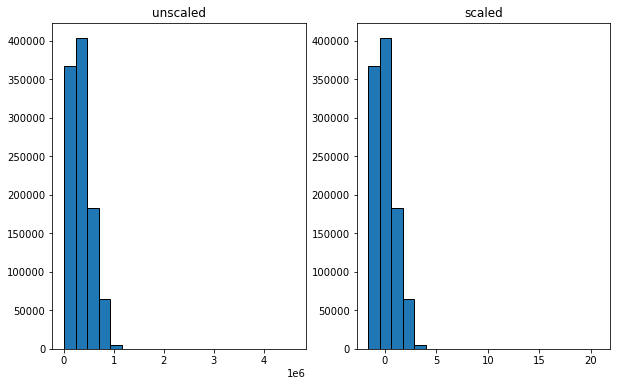

In [12]:
#visualize unscaled vs scaled
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.hist(X_train, bins=20, ec ="black")
plt.title('unscaled')
plt.subplot(122)
plt.hist(X_train_scaled2, bins=20, ec ="black")
plt.title('scaled')

In [13]:
#we will mess will robustscaler as well
scaler3 = RobustScaler()

In [14]:
#fit and transforrm
X_train_scaled3 = scaler3.fit_transform(X_train)

Text(0.5, 1.0, 'scaled')

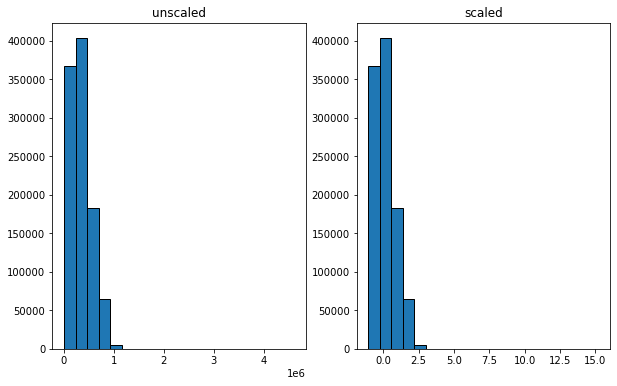

In [15]:
#visualize unscaled vs scaled
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.hist(X_train, bins=20, ec ="black")
plt.title('unscaled')
plt.subplot(122)
plt.hist(X_train_scaled3, bins=20, ec ="black")
plt.title('scaled')

2 Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data

In [23]:
#apply inverse_transform method to scaled x train
inverse_X_train = scaler1.inverse_transform(X_train_scaled1)
inverse_X_train = pd.DataFrame(inverse_X_train)
inverse_X_train.head()

,0
0,529671.0
1,161495.0
2,104395.0
3,500000.0
4,656866.0


In [26]:
X_train[["tax_value"]].head()

,tax_value
1927212,529671
539627,161495
1231220,104395
877619,500000
665807,656866


In [ ]:
#subtract = X_train["tax_value"] - inverse_X_train.astype("int64")

In [28]:
subtract.mean()

-5.307195592784087